In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random
import src
import src.features as lf
import src.models as lm
import src.visualization as lv
from src.models.stages import *


lm.models.RECORD_DIR='./models/records'

### PATH 

PATH = './dataset/'
#PATH = './data/v2-plant-seedlings-dataset'

####Data loading
####---------

data = lf.data_builder.create_dataset_from_directory(PATH)


#### Train Campaigns
campaign_id='test'

## __Background Removal__

- Two colors : **black** and **white**

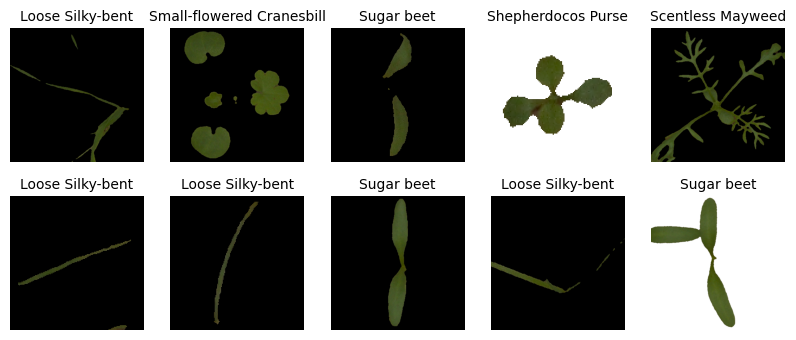

In [2]:
#np.random.seed(3)

f, axes = plt.subplots(2, 5, figsize=(10, 4))
colors  = ['white', 'black']
index   = -1
for i in range(2):
    for j in range(5):
        index = random.sample(range(data.dataframe.shape[0]), 1)[0]
        img = data.dataframe.iloc[index]
        img = plt.imread(img.path)
        image_without_bg = lf.segmentation.remove_background(x=tf.constant(img, dtype=tf.float32), color=colors[np.random.choice([0, 1])])
        axes[i, j].axis('off')
        axes[i, j].imshow(image_without_bg)
        axes[i, j].set_title(data.dataframe.label[index], fontsize='medium')
        
plt.show()

In [3]:
from skimage.transform import resize
import pandas as pd 
from src.streamlit.mods import grad

In [4]:
model = tf.keras.models.load_model('./models/records/final-test2/4-dense-Mob_model.h5')

255.0 255.0


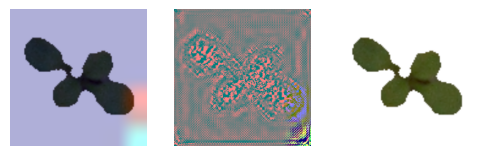

In [10]:
data_prediction = {"actual_labels" : [], "predicted_labels" : [], "scores" : []}
f, axes = plt.subplots(1, 3, figsize=(6, 2))

for i in range(1):
    index = 4455#random.sample(range(3000, data.dataframe.shape[0]), 1)[0]
    img = data.dataframe.iloc[index]
    img = plt.imread(img.path).astype('float32')

    image_without_bg = lf.segmentation.remove_background(
                    x=tf.constant(img, dtype=tf.float32), color="white", radius=4)
    image   = resize(image_without_bg.numpy(), output_shape=(224, 224))
    im      = np.expand_dims(a=image, axis=0) * 255. 

    im_grad, im_guided_grad = grad.gradCAMImage(img=im, base_model=model,segmented=True, guidedGrad_cam=True, idx=4)
    for j in range(3):
        axes[j].axis("off")
    axes[0].imshow(im_grad)
    axes[1].imshow(im_guided_grad)
    axes[2].imshow(im.reshape((224, 224, 3)) / 255)
    y_pred  = model.predict(im, verbose=False)
    pred_class, score = data.classes[np.argmax(y_pred)], y_pred.max()


    data_prediction['actual_labels'].append(data.dataframe.label[index])
    data_prediction["predicted_labels"].append(pred_class)
    data_prediction['scores'].append(score)
    
    plt.show()

    

In [6]:
df_prediction = pd.DataFrame(data_prediction)
display(df_prediction)

,actual_labels,predicted_labels,scores
0,Shepherdocos Purse,Shepherdocos Purse,0.82845


In [7]:

total = np.array(df_prediction['actual_labels'] == df_prediction["predicted_labels"]).sum() / df_prediction.shape[0]
print(f"total = {total * 100} %")

total = 100.0 %


In [8]:
for i,layer in enumerate(model.layers):
    print(" %s --- %d" %(layer.name, i))

 input_1 --- 0
 rescaling --- 1
 Conv --- 2
 Conv/BatchNorm --- 3
 tf.__operators__.add --- 4
 re_lu --- 5
 tf.math.multiply --- 6
 multiply --- 7
 expanded_conv/depthwise --- 8
 expanded_conv/depthwise/BatchNorm --- 9
 re_lu_1 --- 10
 expanded_conv/project --- 11
 expanded_conv/project/BatchNorm --- 12
 expanded_conv/Add --- 13
 expanded_conv_1/expand --- 14
 expanded_conv_1/expand/BatchNorm --- 15
 re_lu_2 --- 16
 expanded_conv_1/depthwise/pad --- 17
 expanded_conv_1/depthwise --- 18
 expanded_conv_1/depthwise/BatchNorm --- 19
 re_lu_3 --- 20
 expanded_conv_1/project --- 21
 expanded_conv_1/project/BatchNorm --- 22
 expanded_conv_2/expand --- 23
 expanded_conv_2/expand/BatchNorm --- 24
 re_lu_4 --- 25
 expanded_conv_2/depthwise --- 26
 expanded_conv_2/depthwise/BatchNorm --- 27
 re_lu_5 --- 28
 expanded_conv_2/project --- 29
 expanded_conv_2/project/BatchNorm --- 30
 expanded_conv_2/Add --- 31
 expanded_conv_3/expand --- 32
 expanded_conv_3/expand/BatchNorm --- 33
 re_lu_6 --- 34
 ex

In [9]:
model.layers[4].output[0]

<KerasTensor: shape=(112, 112, 16) dtype=float32 (created by layer 'tf.__operators__.getitem')>